# MLP for Customer Churn prediction

Based upon data of clients of a bank we calculate whether a customer stands a chance to stay in the company or not.

We will use the [following dataset](https://www.kaggle.com/datasets/shubh0799/churn-modelling).

We may find the following features in the data:

- CustomerId: The unique customer id
- Surname: Customers' Surname
- CreditScore: Their credit score
- Geography: Which Country do they belong to
- Gender: Their Gender
- Age: Age
- Tenure The time of bond with the company
- Balance: The amount left with them
- NumOfProducts: The products they own
- HasCrCard: Do they have a credit card or not
- IsActiveMember: How active members they are
- EstimatedSalary: Their estimated salary
- Exited: Whether they stay in the or leave


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy


In [ ]:
def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

## Load dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Feature engineering

In [ ]:
# Let's check if we have NaNs
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Let's drop some columns we shouldn't use
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])


In [ ]:
# Separate features and target (Exited will be our target)
X = data[data.columns.drop("Exited")]
y = data["Exited"]

print(X.shape, y.shape)

(10000, 10) (10000,)


In [ ]:
# Do train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


### Prepare Numeric and Non-numeric features

In [ ]:
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
print(f"There are {len(numerical_features)} numerical features: {numerical_features}\n")

string_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(f"There are {len(string_features)} string features: {string_features}\n")


There are 8 numerical features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

There are 2 string features: ['Geography', 'Gender']



In [ ]:
# Pipeline for numeric features
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
  ]
)

# Pipeline for string features
string_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False))
  ]
)

# Now let's merge both pipeline into one single pre-processing object
# We can use ColumnTransformer for this
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('string', string_pipeline, string_features)
  ]
)


In [ ]:
X_train_p = full_processor.fit_transform(X_train)
X_test_p = full_processor.transform(X_test)

print(X_train_p.shape, X_test_p.shape)

(8000, 13) (2000, 13)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_p[0]

array([-0.60995667, -0.18211069, -0.69970396,  0.31990917, -0.89997375,
        0.64181837,  0.96704278, -1.68608514,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ])

## Define the model

In [ ]:
# Let's create a simple MLP with Keras
model = keras.Sequential()
model.add(layers.Dense(8, input_dim=13, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We must compile the keras model before training
# During compile we must define:
#  - Loss functions to be used
#  - Optimizer, we will see more about this in "Training tips and tricks"
#  - Metrics, for this particular case we have a classification problem so we 
#    can use accuracy
model.compile(
  loss='sparse_categorical_crossentropy', 
  optimizer='adam',
  metrics=['accuracy'],
)


In [ ]:
# Now we can start training
history = model.fit(
  X_train_p, 
  y_train, 
  epochs=50, 
  batch_size=16, 
  validation_split=0.2
)


Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 0.5034 - accuracy: 0.7745 - val_loss: 0.4528 - val_accuracy: 0.8000
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.7994 - val_loss: 0.4319 - val_accuracy: 0.8062
Epoch 3/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4143 - accuracy: 0.8159 - val_loss: 0.4221 - val_accuracy: 0.8100
Epoch 4/50
400/400 [==============================] - 2s 5ms/step - loss: 0.4014 - accuracy: 0.8241 - val_loss: 0.4143 - val_accuracy: 0.8188
Epoch 5/50
400/400 [==============================] - 2s 5ms/step - loss: 0.3896 - accuracy: 0.8323 - val_loss: 0.4075 - val_accuracy: 0.8238
Epoch 6/50
400/400 [==============================] - 3s 8ms/step - loss: 0.3785 - accuracy: 0.8377 - val_loss: 0.4001 - val_accuracy: 0.8269
Epoch 7/50
400/400 [==============================] - 3s 7ms/step - loss: 0.3691 - accuracy: 0.8427 - val_loss: 0.3917 - val_accuracy: 0.8319
Epoch 

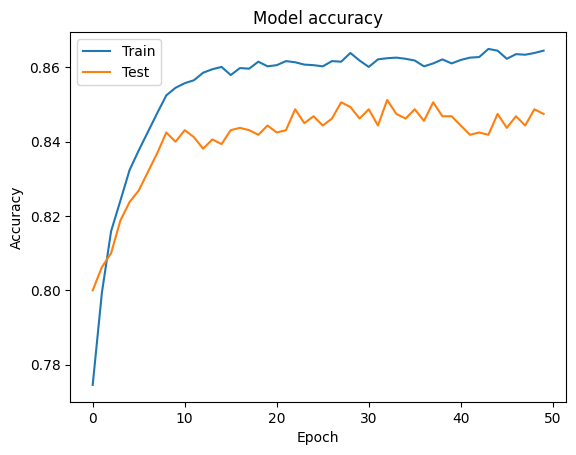

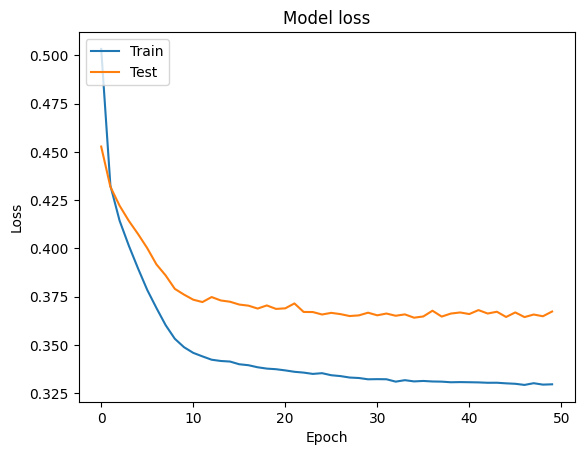

In [ ]:
plot_history(history)

## Let's compare with other types of models


In [ ]:
%%time

# Let's create a pipeline re-using the preprocessing
# but adding a DecisionTreeClassifier 
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', DecisionTreeClassifier())
  ]
)

param_dist = {
  "model__max_depth": [2, 3, 5, 10, None],
  "model__splitter": ["best", "random"],
  "model__max_features": scipy.stats.randint(1, 13),
  "model__min_samples_leaf": scipy.stats.randint(1, 25),
  "model__criterion": ["gini", "entropy"]
}

rsearch = RandomizedSearchCV(
  tree_pipeline,
  param_dist,
  n_iter=150,
  scoring="accuracy",
  cv=5,
  n_jobs=-1,
  random_state=2022,
)

rsearch.fit(X_train, y_train)


CPU times: user 2.49 s, sys: 212 ms, total: 2.7 s
Wall time: 26.7 s


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('number',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                'NumOfProducts',
                                                                                'HasCrCard',
                                                                                'IsActiveMember',
                                                                                'EstimatedSalary']),
                                                                              ('string',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='most_fr...
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [2, 3, 5, 10, None],
                                        'model__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2e3df58190>,
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2e3df5a340>,
                                        'model__splitter': ['best', 'random']},
                   random_state=2022, scoring='accuracy')

In [ ]:
rsearch.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': 10,
 'model__min_samples_leaf': 14,
 'model__splitter': 'best'}

In [ ]:
 rsearch.best_score_

0.8515

## But you told me Neural Networks were the best!!! ヽ(ಠ_ಠ)ノ

Yes! But we may have to carefully tune our neural network architecture and hyperparameters in order to make it work properly.

One easy way is to use [Keras Tuner](https://keras.io/keras_tuner/). We will see more about this in the next few days.
